<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week7/XGBoost/melb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import PartialDependenceDisplay

# Memastikan grafik tampil dalam notebook
%matplotlib inline

* pandas dan numpy digunakan untuk manipulasi data dan operasi numerik.
* train_test_split digunakan untuk membagi data menjadi data latih dan data uji.
* learning_curve digunakan untuk menghitung kurva pembelajaran (learning curve), yang membantu mengevaluasi kinerja model pada ukuran pelatihan yang berbeda.
* mean_squared_error dan mean_absolute_error digunakan untuk menghitung metrik kinerja (MSE dan MAE).
* xgboost digunakan untuk membangun model prediksi menggunakan XGBoost (model boosting berbasis pohon keputusan).
* matplotlib.pyplot digunakan untuk membuat grafik.
* shap digunakan untuk mengukur kontribusi masing-masing fitur terhadap prediksi model dengan menggunakan SHAP values.
* PartialDependenceDisplay untuk menampilkan grafik dependensi parsial (meskipun tidak digunakan dalam kode ini).

In [4]:
# Langkah 2: Memuat Dataset
# Membaca dataset menggunakan pandas

data = pd.read_csv('/content/sample_data/melb_data.csv')

* Membaca dataset dari file CSV.

In [5]:
# Melihat informasi awal tentang dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


* data.info(): Memberikan ringkasan kolom dalam dataset, seperti tipe data dan nilai yang hilang.
* data.head(): Menampilkan lima baris pertama dataset untuk verifikasi.

In [6]:
# Langkah 3: Preprocessing Data
# Menangani nilai yang hilang dan mengonversi data kategorikal menjadi numerik.

# Menghapus baris yang memiliki nilai yang hilang
data = data.dropna()

* dropna(): Menghapus baris dengan nilai hilang agar dataset bersih.

In [7]:
# Mengonversi data kategorikal menjadi bentuk numerik dengan one-hot encoding
data = pd.get_dummies(data, drop_first=True)

* get_dummies(): Mengubah kolom kategorikal menjadi numerik (one-hot encoding).

In [8]:
# Memisahkan fitur dan target
X = data.drop('Price', axis=1)  # Asumsi 'Price' adalah target prediksi
y = data['Price']

* X = data.drop('Price', axis=1): Mengambil semua fitur (kecuali target 'Price') sebagai data input X.
* y = data['Price']: Menyimpan kolom 'Price' sebagai target output y.

In [9]:
# Memisahkan data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* train_test_split: Memisahkan data menjadi set latih (80%) dan set uji (20%).

In [10]:
# Langkah 4: Melatih Model XGBoost
# Membuat model XGBoost dan melatihnya menggunakan data latih.

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

* XGBRegressor: Model XGBoost untuk regresi. Parameter utama meliputi:

1. n_estimators: Jumlah pohon.
2. learning_rate: Kecepatan pembelajaran.
3. max_depth: Kedalaman pohon maksimal untuk mengontrol kompleksitas.

In [11]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

* y_pred = model.predict(X_test): Menggunakan model yang telah dilatih untuk membuat prediksi pada data uji X_test.

In [12]:
# Menghitung metrik kinerja
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 61954519293.396484
Mean Absolute Error: 156851.9529485887


* mean_squared_error(y_test, y_pred) dan mean_absolute_error(y_test, y_pred) digunakan untuk menghitung dua metrik kinerja utama: MSE (kesalahan kuadrat rata-rata) dan MAE (kesalahan absolut rata-rata).

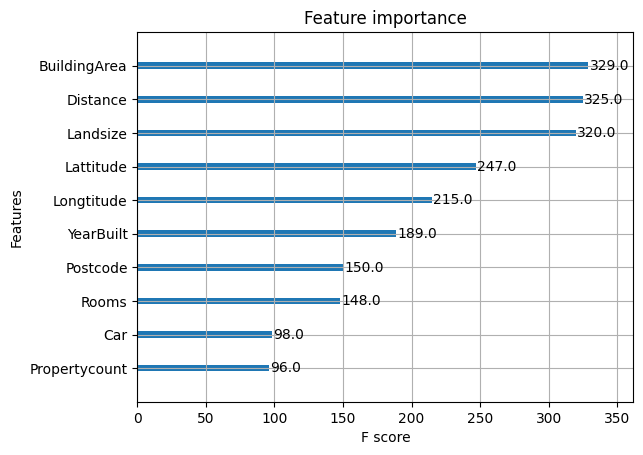

In [13]:
# Langkah 5: Visualisasi Feature Importance
# Melihat fitur paling penting dalam model menggunakan plot kepentingan fitur.

xgb.plot_importance(model, max_num_features=10)
plt.show()

* xgb.plot_importance(model, max_num_features=10): Menampilkan 10 fitur terpenting yang digunakan oleh model XGBoost untuk membuat prediksi. Ini membantu untuk mengetahui fitur mana yang memiliki pengaruh terbesar terhadap keputusan model.
* plt.show(): Menampilkan grafik.

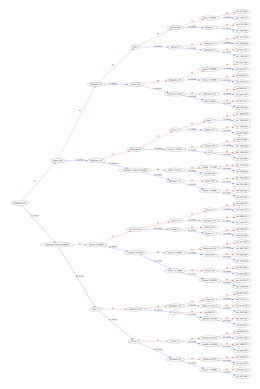

In [14]:
# Langkah 6: Visualisasi Struktur Pohon
# Menampilkan salah satu pohon dalam model XGBoost.

xgb.plot_tree(model, num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()


* plot_tree(): Menampilkan struktur pohon keputusan untuk melihat bagaimana model membuat keputusan di setiap cabang.

In [16]:
# Langkah 7: Learning Curve
# Menentukan ukuran pelatihan yang berbeda
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

* train_sizes, train_scores, test_scores: Mencatat ukuran pelatihan, skor pelatihan, dan skor validasi berdasarkan berbagai ukuran pelatihan.

In [17]:
# Menghitung rata-rata kesalahan untuk setiap ukuran pelatihan
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

* train_scores.mean(axis=1): Menghitung rata-rata dari train_scores untuk setiap ukuran pelatihan. train_scores adalah skor kesalahan (error) pada data pelatihan, yang diperoleh dari fungsi learning_curve yang digunakan sebelumnya.
* axis=1 berarti menghitung rata-rata sepanjang baris, sehingga menghasilkan nilai rata-rata untuk setiap ukuran pelatihan yang berbeda.
* Tanda negatif (-) digunakan di sini karena learning_curve menghasilkan nilai skor negatif untuk neg_mean_squared_error yang dipilih sebagai metrik. Secara default, MSE (mean squared error) dihitung dengan nilai negatif untuk tujuan optimisasi. Tanda negatif digunakan untuk mengubah skor menjadi positif, karena MSE dan MAE adalah metrik kesalahan yang semakin kecil nilainya semakin baik.
* train_scores_mean dan test_scores_mean sekarang masing-masing menyimpan rata-rata kesalahan untuk data pelatihan dan validasi pada berbagai ukuran pelatihan.

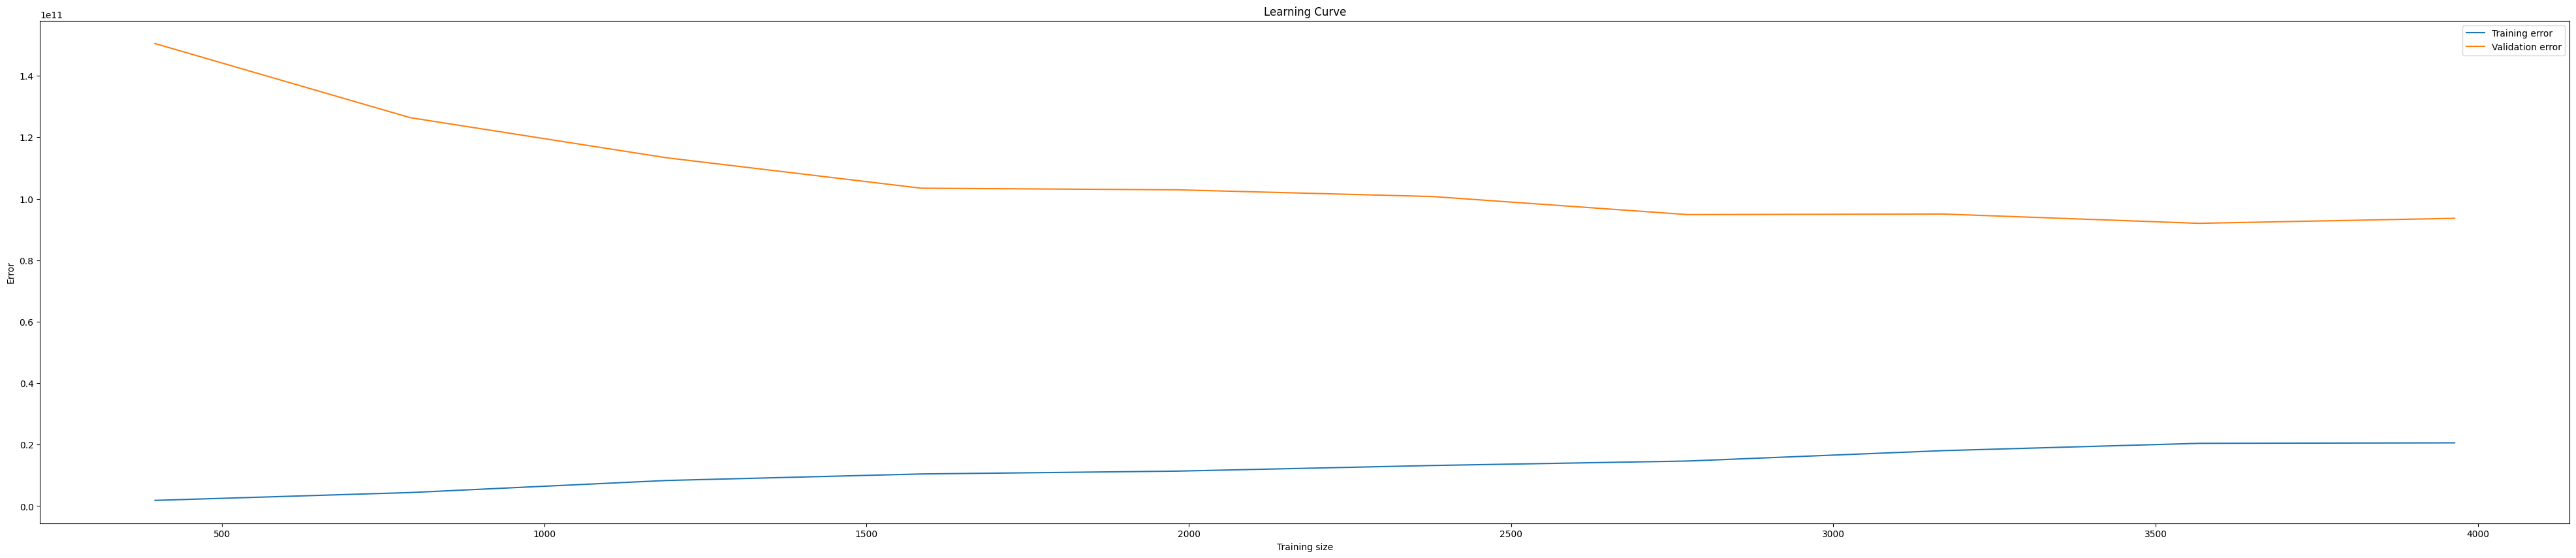

In [18]:
# Plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('Error')
plt.legend()
plt.title("Learning Curve")
plt.show()

* plt.plot(): Membuat grafik yang menunjukkan kesalahan (error) pada data pelatihan dan data validasi, sehingga dapat dilihat apakah model mengalami overfitting atau underfitting.

In [25]:
# Langkah 8: SHAP Values
# Memeriksa tipe data dalam X_train
print(X_train.dtypes)

Rooms                                      int64
Distance                                 float64
Postcode                                 float64
Bedroom2                                 float64
Bathroom                                 float64
                                          ...   
Regionname_Northern Victoria                bool
Regionname_South-Eastern Metropolitan       bool
Regionname_Southern Metropolitan            bool
Regionname_Western Metropolitan             bool
Regionname_Western Victoria                 bool
Length: 6709, dtype: object


* Mencetak tipe data dari setiap kolom di dalam dataset pelatihan (X_train).

In [26]:
# Jika masih ada kolom object, lakukan konversi lagi atau cek datanya
# Coba jalankan one-hot encoding jika belum
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

* pd.get_dummies(): Mengubah fitur kategorikal menjadi representasi numerik melalui teknik one-hot encoding. Ini diperlukan karena XGBoost dan model-model lainnya memerlukan data numerik.

In [27]:
# Menyamakan kolom di X_train dan X_test jika ada perbedaan setelah encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


* X_train.align(X_test, join='left', axis=1, fill_value=0): Menyamakan kolom fitur antara data pelatihan dan data uji setelah encoding, untuk memastikan kedua dataset memiliki kolom yang sama.

In [28]:
# Konversi semua kolom ke float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

* Perintah ini mengonversi seluruh dataset pelatihan (X_train) dan data pengujian (X_test) menjadi tipe data float.
* Konversi ini dilakukan untuk memastikan bahwa semua kolom dalam dataset memiliki tipe data numerik yang sesuai, yang diperlukan oleh model pembelajaran mesin (terutama XGBoost) untuk melakukan komputasi dan prediksi dengan benar.
* Jika ada kolom yang sebelumnya bertipe object atau int, konversi ke float memastikan data dapat diterima oleh model.

In [29]:
# Menggunakan SHAP untuk mengukur kontribusi fitur terhadap prediksi model.

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

* shap.Explainer(model, X_train): Membuat objek explainer yang digunakan untuk mengukur kontribusi setiap fitur terhadap prediksi model.
* shap_values = explainer(X_test): Menghitung nilai SHAP untuk setiap prediksi pada data uji X_test.

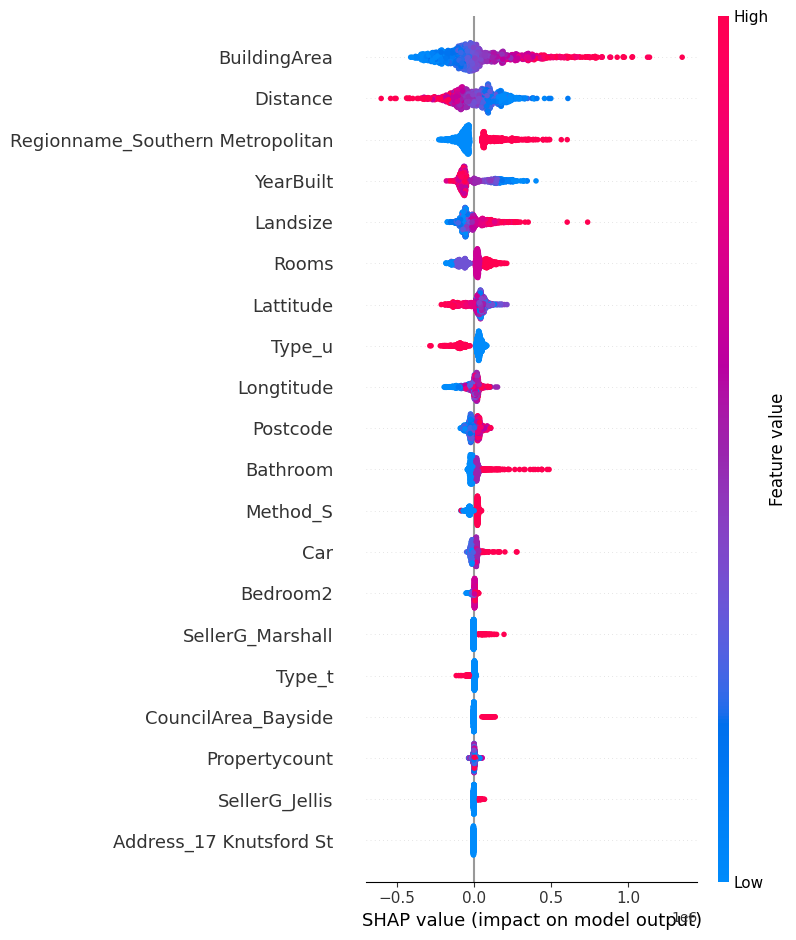

In [30]:
# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_test)

* Menampilkan summary plot yang menggambarkan kontribusi setiap fitur terhadap model. Warna dan posisi titik dalam plot menunjukkan pentingnya dan pengaruh fitur terhadap prediksi.

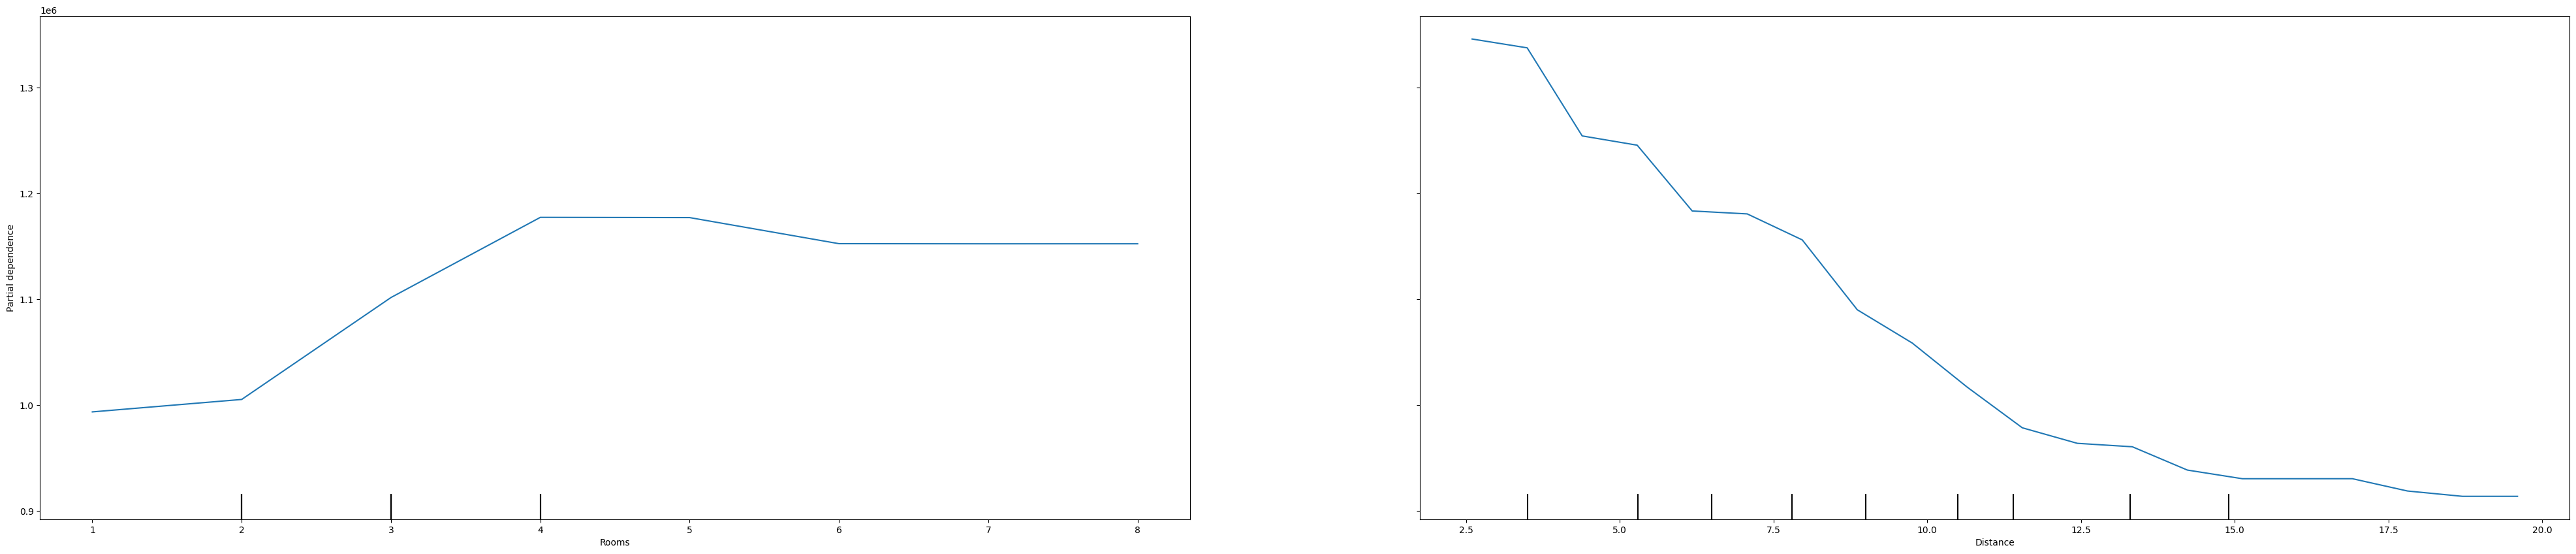

In [31]:
# Langkah 9: Partial Dependence Plot (PDP)
# Melihat hubungan antara fitur tertentu dan prediksi model dengan PDP.

PartialDependenceDisplay.from_estimator(model, X_train, [0, 1], grid_resolution=20)
plt.show()


* Partial Dependence Plot (PDP): Menampilkan hubungan antara fitur tertentu dan prediksi saat fitur lain diset konstan.